In [100]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [101]:
!pip install easyocr
!pip install imutils
!pip insatt opencv-python-hedless==4.1.2.30
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

ERROR: unknown command "insatt" - maybe you meant "install"
Looking in indexes: https://download.pytorch.org/whl/cu118


In [103]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

###Convert Colored Image into Grayscale Format


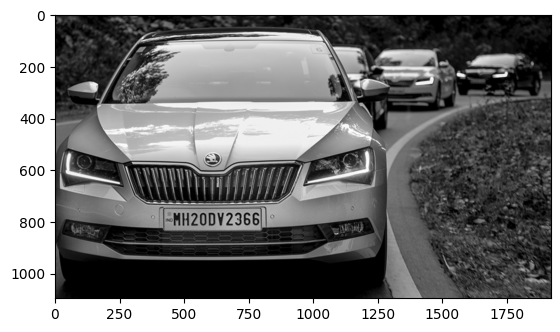

In [102]:
# Taking input of cars image
img = cv2.imread("/content/india-skoda-license-plate.jpg")
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

###Apply Filter and Edge Detection

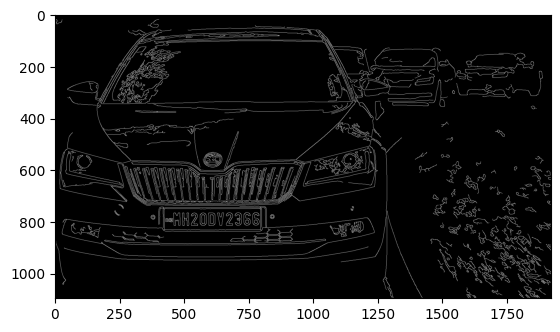

In [104]:
bfilter = cv2.bilateralFilter(gray, 11,17,17)
edged = cv2.Canny(bfilter, 30 ,200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

#Find Contours and Apply Mask

In [105]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse=True)[:10]

In [106]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,50,True)
    if len(approx)==4:
        location = approx
        break
print(location)

[[[421 753]]

 [[421 832]]

 [[794 831]]

 [[791 750]]]


In [107]:
mask  = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)


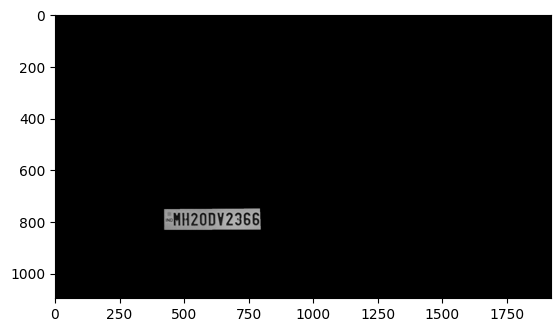

In [108]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [109]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

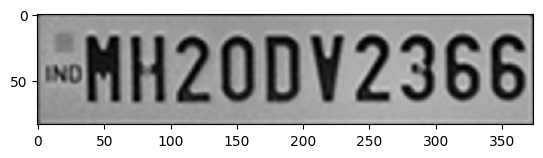

In [110]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

###Easy OCR to read Text

In [111]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[0, 1], [374, 1], [374, 79], [0, 79]], '~HHZODV2366 ', 0.44101918310346316)]

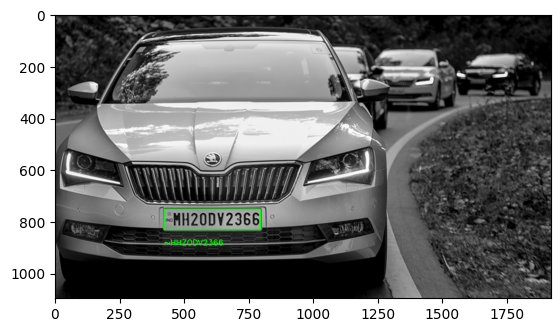

In [112]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text, (approx[0][0][0], approx[1][0][1] + 60), font, 1, (0, 255, 0), 2, cv2.LINE_AA, False)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))


In [113]:
NumberPlate = result[0][-2]
print("Vehicle Number : ",NumberPlate)

Vehicle Number :  ~HHZODV2366 


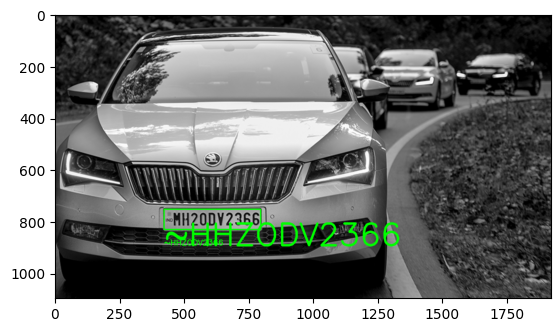

In [114]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 4.0  # You can adjust this value to increase or decrease the font size
font_thickness = 7  # You can adjust this value to change the font thickness

# Calculate the position for the text
text_position = (approx[0][0][0], approx[1][0][1] + 60)

# Draw the text with the specified font size and thickness
res = cv2.putText(img, text, text_position, font, font_scale, (0, 255, 0), font_thickness, cv2.LINE_AA, False)

# Draw the rectangle
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)

# Display the image
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))


# Storing the number of vehicle in a CSV file


In [115]:
import datetime
import pytz

# Specify the timezone for India
india_timezone = pytz.timezone('Asia/Kolkata')

# Get the current date and time in India
current_date_time_in_india = datetime.datetime.now(india_timezone)

# Format the date and time
formatted_date_time = current_date_time_in_india.strftime("%Y-%m-%d %H:%M:%S")

# Print the current date and time in India
print("Current date and time in India:", formatted_date_time)


Current date and time in India: 2023-09-16 10:39:21


In [120]:
import datetime
import csv
import pytz

# Specify the timezone for India
india_timezone = pytz.timezone('Asia/Kolkata')

# Your calculator code here
# Calculate the result or provide a value for 'result'
result = NumberPlate  # Replace this with your calculation

# Get the current date and time in India's timezone
current_datetime = datetime.datetime.now(india_timezone)

# Get the current date in YYYY-MM-DD format
current_date = current_datetime.strftime('%Y-%m-%d')

# Format the time to include only hour and minute
current_time = current_datetime.strftime('%H:%M')

# Create a CSV file name with the current date and time
file_name = f"NumberPlate_on_{current_date}.csv"

# Create a list with the data you want to write to the CSV file
data_to_write = [(result, current_date, current_time)]

print("Saving Detailes .......")

# Check if the file already exists
file_exists = False
try:
    with open(file_name, mode='r') as csv_file:
        file_exists = True
except FileNotFoundError:
    pass

# Open the CSV file in append mode ('a') if it exists, or create a new one if it doesn't
with open(file_name, "a", newline='') as csv_file:
    csv_writer = csv.writer(csv_file)

    # If the file is newly created, write the header row
    if not file_exists:
        csv_writer.writerow(["Result", "Date", "Time"])

    # Write the data to the CSV file
    csv_writer.writerows(data_to_write)

print(f"Result has been saved to {file_name}")



Saving Detailes .......
Result has been saved to NumberPlate_on_2023-09-16.csv


In [121]:

# Now, you can read the CSV file
try:
    # Open the CSV file in read mode
    with open(file_name, mode='r') as csv_file:
        # Create a CSV reader object
        csv_reader = csv.reader(csv_file)

        # Iterate through each row in the CSV file
        for row in csv_reader:
            print(row)
except FileNotFoundError:
    print(f"The file '{file_name}' was not found.")


['Result', 'Date', 'Time']
['~HHZODV2366 ', '2023-09-16', '10:39']
['~HHZODV2366 ', '2023-09-16', '10:49']
['~HHZODV2366 ', '2023-09-16', '10:49']
['~HHZODV2366 ', '2023-09-16', '10:49']
